In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline


In [2]:
fname = r'states_202205241327.csv'

df = pd.read_csv(fname, sep=',')
df.head()

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,old_state_id
0,1,person,person.georgii,unknown,"{""editable"":false,""id"":""georgii"",""source"":""per...",32,2022-05-24 09:19:07.241,2022-05-24 09:19:07.241,2022-05-24 09:19:07.241,NaN
1,2,sun,sun.sun,above_horizon,"{""next_dawn"":""2022-05-25T02:45:38.202291+00:00...",48,2022-05-24 09:19:10.696,2022-05-24 09:19:10.696,2022-05-24 09:19:10.696,NaN
2,3,script,script.lumi_blink,off,"{""last_triggered"":""2022-05-20T15:00:09.414618+...",99,2022-05-24 09:19:27.417,2022-05-24 09:19:27.417,2022-05-24 09:19:27.417,NaN
3,4,zone,zone.home,zoning,"{""latitude"":52.3731339,""longitude"":4.8903147,""...",103,2022-05-24 09:19:27.515,2022-05-24 09:19:27.515,2022-05-24 09:19:27.515,NaN
4,5,automation,automation.novaia_avtomatizatsiia,on,"{""last_triggered"":""2022-05-19T15:30:27.445792+...",130,2022-05-24 09:19:28.716,2022-05-24 09:19:28.716,2022-05-24 09:19:28.716,NaN


In [5]:
# выбор данных о работе датчика влажности (state:value)
ent_id = 'sensor.datchik_vlazhnosti_i_temperatury_humidity'
my_filter = (df['entity_id'] == ent_id) & (df['state'] != 'unknown')
my_columns = ['state', 'last_changed', 'last_updated', 'created']
df0 = df[my_filter][my_columns]
df0

,state,last_changed,last_updated,created
63,34.68,2022-05-24 09:38:33.167,2022-05-24 09:38:33.167,2022-05-24 09:38:33.167
72,34.66,2022-05-24 09:44:35.867,2022-05-24 09:44:35.867,2022-05-24 09:44:35.867
110,34.66,2022-05-24 10:02:38.629,2022-05-24 10:02:38.629,2022-05-24 10:02:38.629
159,40.67,2022-05-24 10:10:40.724,2022-05-24 10:10:40.724,2022-05-24 10:10:40.724
168,42.19,2022-05-24 10:11:59.498,2022-05-24 10:11:59.498,2022-05-24 10:11:59.498
198,37.71,2022-05-24 10:15:43.378,2022-05-24 10:15:43.378,2022-05-24 10:15:43.378
215,35.5,2022-05-24 10:18:29.398,2022-05-24 10:18:29.398,2022-05-24 10:18:29.398
227,35.77,2022-05-24 10:22:16.086,2022-05-24 10:22:16.086,2022-05-24 10:22:16.086
239,35.33,2022-05-24 10:25:48.503,2022-05-24 10:25:48.503,2022-05-24 10:25:48.503


In [26]:
X0 = list(df0['last_changed'])
Y0 = list(df0['state'])
Y0 = list(map(float, Y0))
X0, Y0

(['2022-05-24 09:38:33.167',
  '2022-05-24 09:44:35.867',
  '2022-05-24 10:02:38.629',
  '2022-05-24 10:10:40.724',
  '2022-05-24 10:11:59.498',
  '2022-05-24 10:15:43.378',
  '2022-05-24 10:18:29.398',
  '2022-05-24 10:22:16.086',
  '2022-05-24 10:25:48.503'],
 [34.68, 34.66, 34.66, 40.67, 42.19, 37.71, 35.5, 35.77, 35.33])

In [27]:
# Формируем данные для построения графика

from datetime import datetime
def ConvDate(d, dd): # date -> millisec
    return (datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f').timestamp() * 1000 - dd) // 1e0

d0, d1 = X0[0], X0[-1]
delta = datetime.strptime(d0, '%Y-%m-%d %H:%M:%S.%f').timestamp() * 1000

                              
X, Y = [X0[0],], [Y0[0],]
for i in range(1, len(Y0)):
    X.append(X0[i])
    Y.append(Y0[i-1])
    X.append(X0[i])
    Y.append(Y0[i])

#X = list(map(lambda item: ConvDate(item, delta), X)) 

X, Y

(['2022-05-24 09:38:33.167',
  '2022-05-24 09:44:35.867',
  '2022-05-24 09:44:35.867',
  '2022-05-24 10:02:38.629',
  '2022-05-24 10:02:38.629',
  '2022-05-24 10:10:40.724',
  '2022-05-24 10:10:40.724',
  '2022-05-24 10:11:59.498',
  '2022-05-24 10:11:59.498',
  '2022-05-24 10:15:43.378',
  '2022-05-24 10:15:43.378',
  '2022-05-24 10:18:29.398',
  '2022-05-24 10:18:29.398',
  '2022-05-24 10:22:16.086',
  '2022-05-24 10:22:16.086',
  '2022-05-24 10:25:48.503',
  '2022-05-24 10:25:48.503'],
 [34.68,
  34.68,
  34.66,
  34.66,
  34.66,
  34.66,
  40.67,
  40.67,
  42.19,
  42.19,
  37.71,
  37.71,
  35.5,
  35.5,
  35.77,
  35.77,
  35.33])

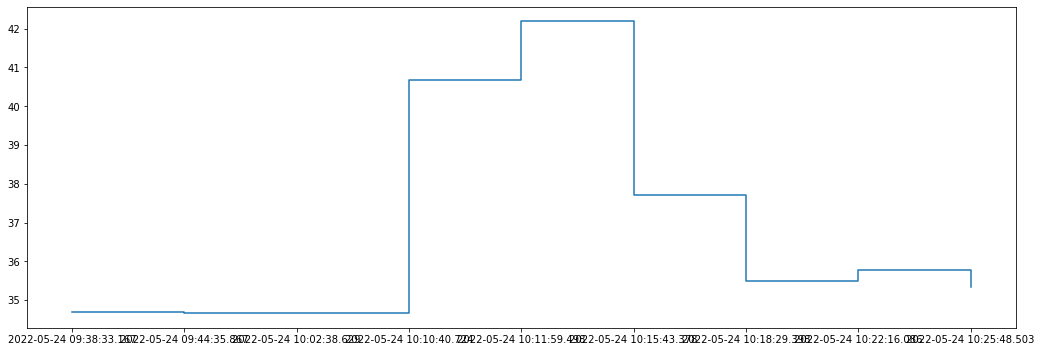

In [28]:
def cm_to_inch(value):
    return value/2.54

plt.figure(figsize=(cm_to_inch(45), cm_to_inch(15)))
plt.plot(X, Y)
plt.show()